## Comparing Baseline method x PinGUMiL x Profile-enhanced methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from numpy import trapz
import os
import glob

In [34]:
def plot_df(df, title=None, auc_table=None):
    # Get default color cycle
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Plot the dataframe with gray dashed lines (apply alpha for transparency)
    ax = df.plot(marker=None, linewidth=1, figsize=(10, 5), color="gray", linestyle="--", alpha=0.7, title=title)

    # Plot the markers separately with full opacity
    for i, col in enumerate(df.columns):
        ax.plot(df.index, df[col], marker="o", linestyle="", color=colors[i % len(colors)], markersize=6)

    # Create custom legend with only markers
    handles, labels = ax.get_legend_handles_labels()
    for i, col in enumerate(df.columns):
        # Create a proxy artist for the legend to show only the markers
        handles[i] = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i % len(colors)], 
                                markersize=10, label=labels[i])

    # Redraw the legend
    ax.legend(handles, labels)
    
    ax.set_xlabel("Timestamp (s)")
    
    if (auc_table):
        print([float(x) for x in auc_table.values()])
        my_table = plt.table(cellText=[["{:.2f}".format(x)] for x in auc_table.values()],
                        colWidths=[0.1] * 3,
                        rowLabels=list(auc_table.keys()),
                        colLabels=["F1 AUC"],
                        loc='upper right')

    plt.show()

### Baseline methods

In [3]:
baseline_df_dict = {}
baseline_auc_dict = {}

### ASM

ASM_B 29.99064153439154


<AxesSubplot:xlabel='timestamp'>

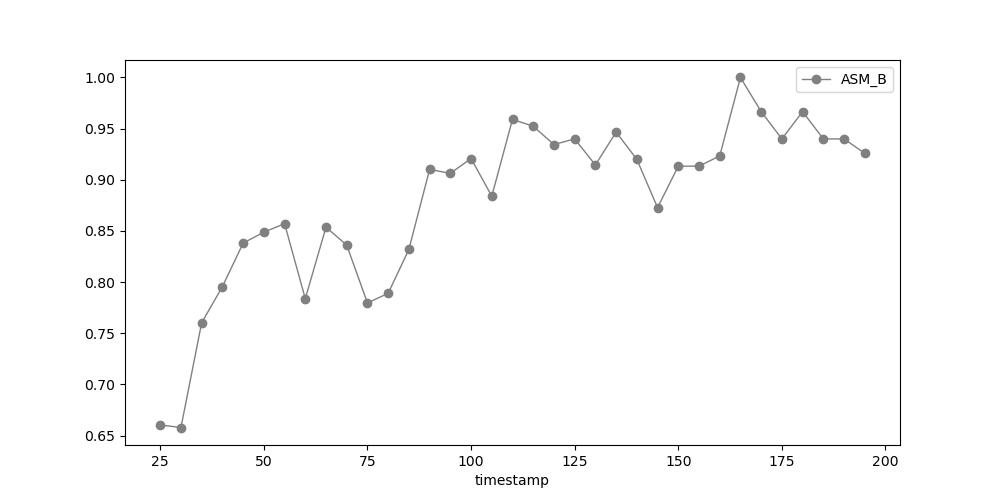

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


In [4]:
result_dict = {}
asm_input_files = { "ASM_B" : "asm_results/asm_sg3f_10fold_test.csv" }
for model_name, input_file in asm_input_files.items():
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    baseline_df_dict[model_name] = result_df
    baseline_auc_dict[model_name] = area
#print(result_df)
#result_df.plot.line(figsize=(10,5))
result_df.plot(marker="o", color="gray", linewidth=1, figsize=(10,5))

### LGBM

In [5]:
lgbm_input_files = { "LGBM_B" : "lgb_results/lgb_sk10f_test.csv",
                    "LGBM_CSF_B" : "lgb_results/lgb_sk10f_csf_test.csv"}
for model_name, input_file in lgbm_input_files.items():
    result_dict = {}
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    baseline_df_dict[model_name] = result_df
    baseline_auc_dict[model_name] = area

LGBM_B 14.016862674362676
LGBM_B 15.759019961519963
LGBM_CSF_B 15.080477392977395


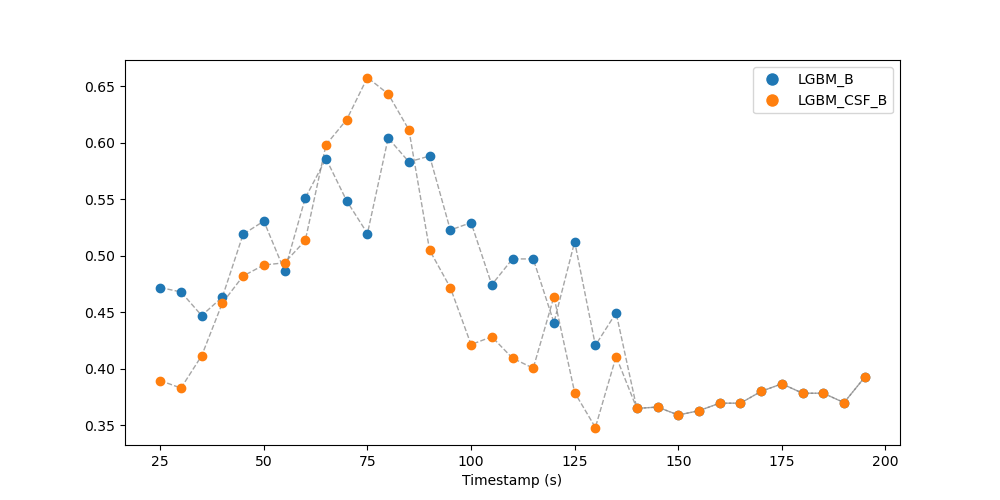

'ax = lgbm_df.plot(marker="o", linewidth=1, figsize=(10,5), color="gray", linestyle="--")\ncolors = plt.rcParams[\'axes.prop_cycle\'].by_key()[\'color\']\nfor i, line in enumerate(ax.get_lines()):\n    line.set_alpha(0.7)\n    line.set_markerfacecolor(colors[i % len(colors)])  # Reset marker color to default cycle\n    line.set_markeredgecolor(colors[i % len(colors)])  # Set marker edge color to match\n    \n# Update the legend to reflect marker colors\nhandles, labels = ax.get_legend_handles_labels()\nfor i, line in enumerate(ax.get_lines()):\n    # Create a proxy artist for the legend to show only the markers\n    handles[i] = plt.Line2D([0], [0], marker=\'o\', color=\'w\', markerfacecolor=colors[i % len(colors)], \n                            markersize=10, label=labels[i])\n\n# Redraw the legend\nax.legend(handles, labels)\n\nplt.show()\n\nplt.show()'

In [ ]:
lgbm_df = baseline_df_dict[list(lgbm_input_files.keys())[0]]
lgbm_df = pd.merge(lgbm_df, baseline_df_dict[list(lgbm_input_files.keys())[1]], on="timestamp")
plot_df(lgbm_df, "Win Prediction f1 curve - LGB")
'''ax = lgbm_df.plot(marker="o", linewidth=1, figsize=(10,5), color="gray", linestyle="--")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, line in enumerate(ax.get_lines()):
    line.set_alpha(0.7)
    line.set_markerfacecolor(colors[i % len(colors)])  # Reset marker color to default cycle
    line.set_markeredgecolor(colors[i % len(colors)])  # Set marker edge color to match
    
# Update the legend to reflect marker colors
handles, labels = ax.get_legend_handles_labels()
for i, line in enumerate(ax.get_lines()):
    # Create a proxy artist for the legend to show only the markers
    handles[i] = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i % len(colors)], 
                            markersize=10, label=labels[i])

# Redraw the legend
ax.legend(handles, labels)

plt.show()

plt.show()'''

### LR

In [7]:
lr_input_files = { "LR_B" : "lr_results/lr_sk10f_test.csv",
                    "LR_CSF_B" : "lr_results/lr_sk10f_csf_test.csv"}
for model_name, input_file in lr_input_files.items():
    result_dict = {}
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        print(param)
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        print(param_df.index)
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    print(result_df.index)
    baseline_df_dict[model_name] = result_df
    baseline_auc_dict[model_name] = area

{"alpha": 1}
Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0,
              160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0],
             dtype='float64', name='timestamp')
LR_B 16.06509199134199
{"alpha": 0.1}
Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0,
              160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0],
             dtype='float64', name='timestamp')
LR_B 16.25143338143338
{"alpha": 0.01}
Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 

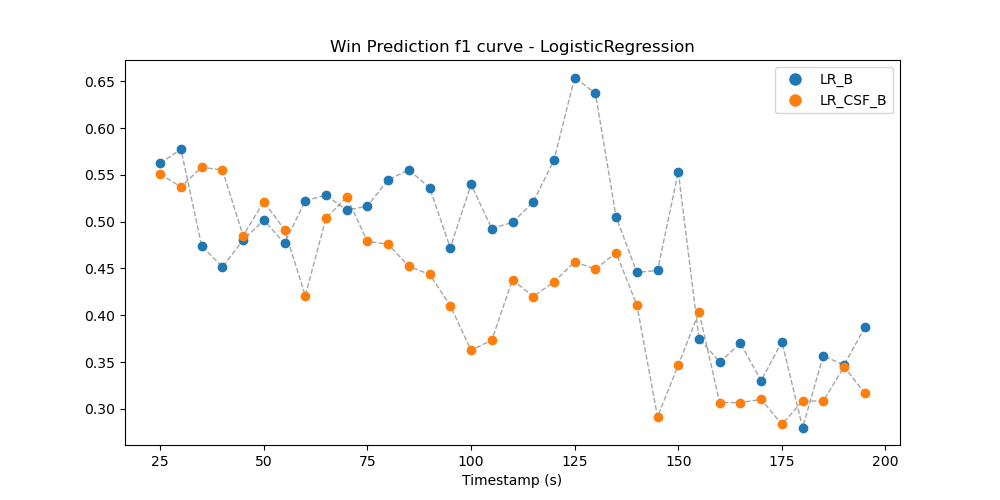

In [37]:
lr_df = baseline_df_dict[list(lr_input_files.keys())[0]]
lr_df = pd.merge(lr_df, baseline_df_dict[list(lr_input_files.keys())[1]], on="timestamp")
plot_df(lr_df, "Win Prediction f1 curve - LogisticRegression")
#lr_df.plot.line(figsize=(10,5))

### RF

In [11]:
rf_input_files = { "RF_B" : "rf_results/rf_sk10f_test.csv",
                    "RF_CSF_B" : "rf_results/rf_sk10f_csf_test.csv"}
for model_name, input_file in rf_input_files.items():
    result_dict = {}
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    baseline_df_dict[model_name] = result_df
    baseline_auc_dict[model_name] = area

RF_B 17.94292207792208
RF_CSF_B 19.65525974025974


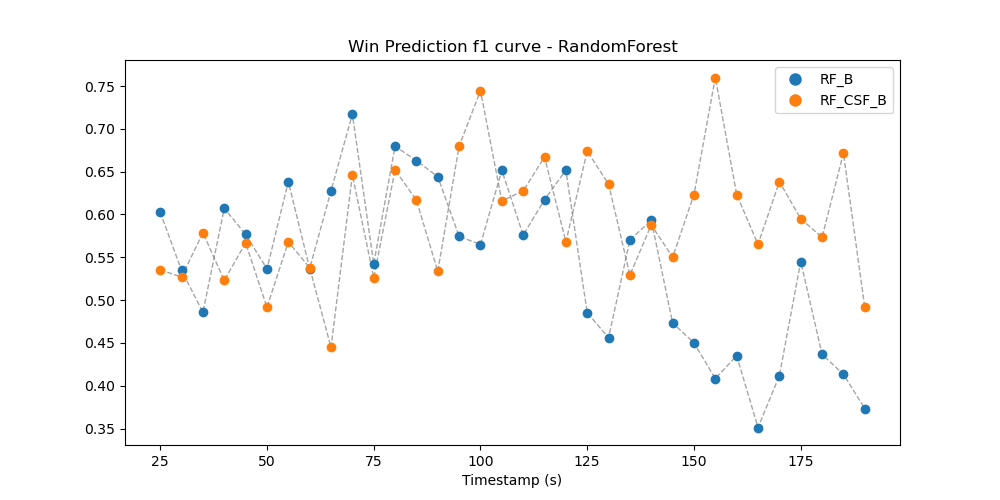

In [38]:
rf_df = baseline_df_dict[list(rf_input_files.keys())[0]]
rf_df = pd.merge(rf_df, baseline_df_dict[list(rf_input_files.keys())[1]], on="timestamp")
plot_df(rf_df,"Win Prediction f1 curve - RandomForest" )

### All baselines

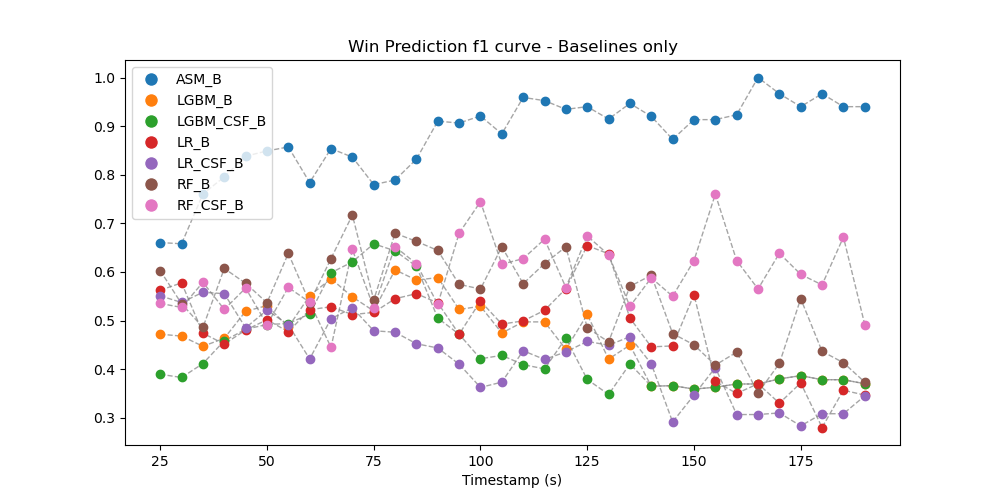

In [36]:
all_baselines_df = None
for model, df in baseline_df_dict.items():
    if not isinstance(all_baselines_df, pd.DataFrame):
        all_baselines_df = df
    else:
        all_baselines_df = pd.merge(all_baselines_df, df, on="timestamp")
    #print(model, df.index)
plot_df(all_baselines_df, "Win Prediction f1 curve - Baselines only")
#all_baselines_df.plot.line(figsize=(10,5))

In [14]:
print(baseline_auc_dict)

{'ASM_B': 29.99064153439154, 'LGBM_B': 15.759019961519963, 'LGBM_CSF_B': 15.080477392977395, 'LR_B': 16.26750481000481, 'LR_CSF_B': 14.317561327561325, 'RF_B': 17.94292207792208, 'RF_CSF_B': 19.65525974025974}


In [15]:
print(all_baselines_df.index)

Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0,
              160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0],
             dtype='float64', name='timestamp')


## PinGUMiL

In [16]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/allts_2"
files = glob.glob(exp_log_path+"/*/*.csv", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
for file in files:
    df = pd.read_csv(file)
    exp_dict["f1_test"].append(df['f1_test'].mean())
    exp_dict["timestamp"].append(df['timestamp'][0])
pingumil_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "PinGUMiL"}).set_index("timestamp")

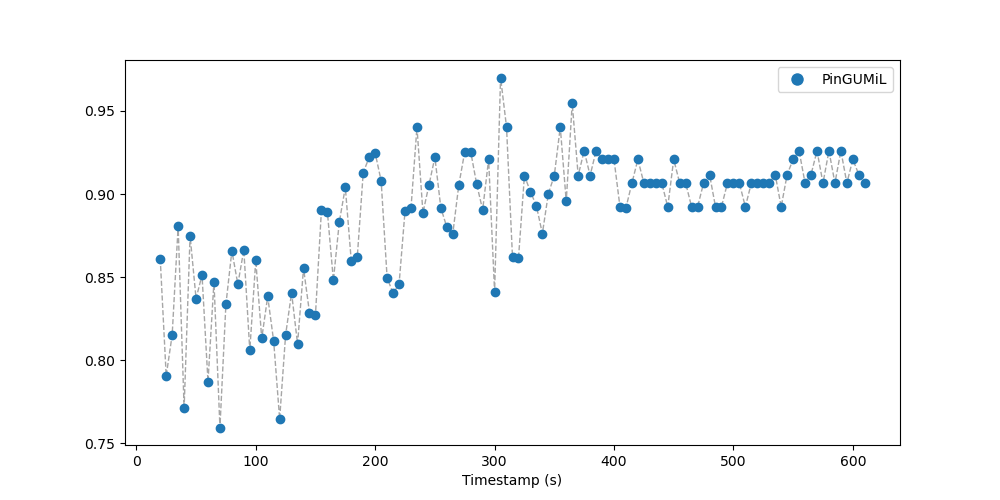

In [17]:
plot_df(pingumil_df)

### Baseline vs PinGUMiL

Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0,
              160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0],
             dtype='float64', name='timestamp')
Int64Index([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
            ...
            565, 570, 575, 580, 585, 590, 595, 600, 605, 610],
           dtype='int64', name='timestamp', length=119)


<AxesSubplot:xlabel='timestamp'>

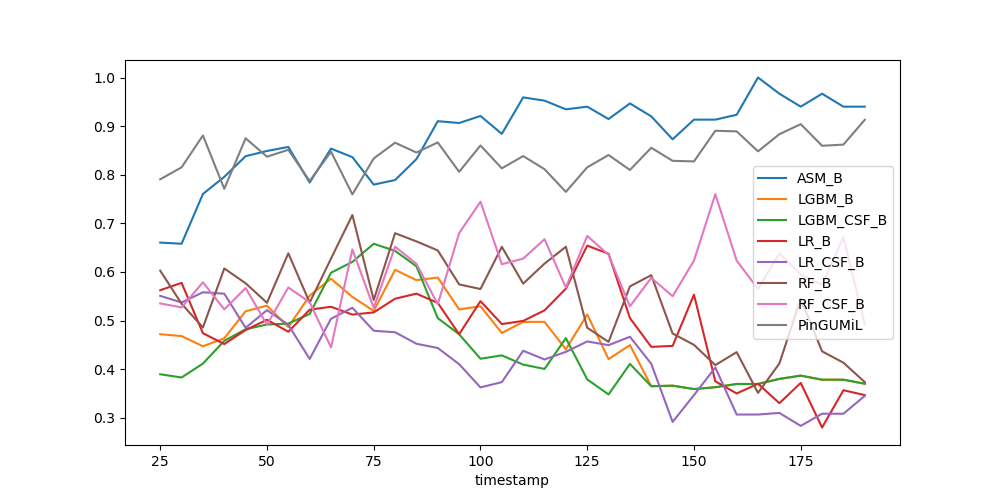

In [17]:
print(all_baselines_df.index)
print(pingumil_df.index)
cp_baseping_df = pd.merge(all_baselines_df, pingumil_df, on="timestamp", how="left")
cp_baseping_df.plot.line(figsize=(10,5))

In [50]:
cp_baseping_df.index

Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0,
              160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0],
             dtype='float64', name='timestamp')

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0,
              160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0],
             dtype='float64', name='timestamp')


<AxesSubplot:xlabel='timestamp'>

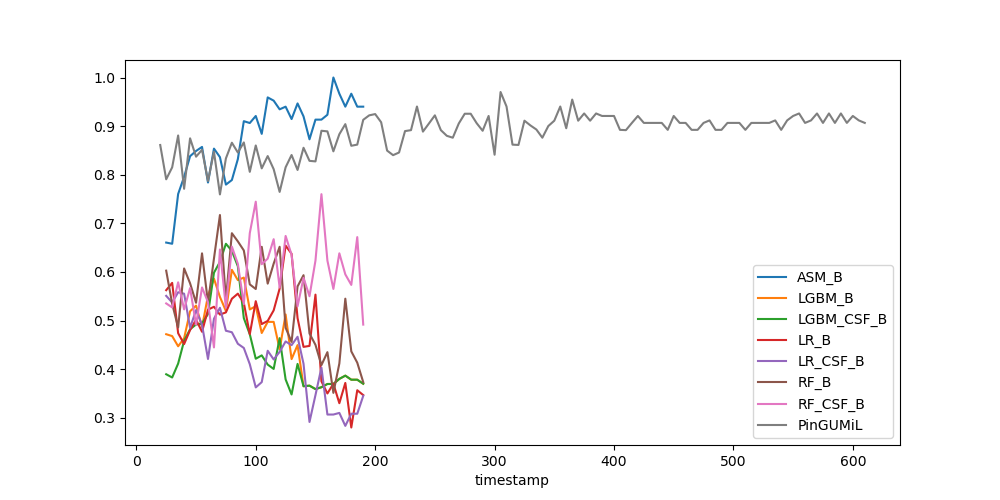

In [19]:
cp_baseping_df = pd.merge(all_baselines_df, pingumil_df, on="timestamp", how="right")
print(all_baselines_df.index)
cp_baseping_df.plot.line(figsize=(10,5))

## Profile Enhanced Models

In [20]:
import glob

In [21]:
profiled_df_dict = {}
profiled_auc_dict = {}

In [22]:
def get_profile_model_name(inputfile, has_csf=True):
    substrings = inputfile.split("_")
    model_prefix = substrings[0]
    if has_csf and substrings[2] == "csf":
        cluster_tag = substrings[3]
        return f"{model_prefix.upper()}_CSF_{cluster_tag.upper()}"
    else:
        cluster_tag = substrings[2]
        return f"{model_prefix.upper()}_{cluster_tag.upper()}"

In [23]:
def merge_all_dfs(list_df):
    merge_df = None
    for df in list_df:
        if not isinstance(merge_df, pd.DataFrame):
            merge_df = df
        else:
            merge_df = pd.merge(merge_df, df, on="timestamp")
    return merge_df

In [24]:
def plot_baseline_vs_profile(model_suffix):
    baselines = [v for k,v in baseline_df_dict.items() if model_suffix in k]
    profiles = [v for k,v in profiled_df_dict.items() if model_suffix in k]
    #print(len(asm_baselines+asm_profiles))
    bvp_df = None
    for df in baselines+profiles:
        if not isinstance(bvp_df, pd.DataFrame):
            bvp_df = df
        else:
            bvp_df = pd.merge(bvp_df, df, on="timestamp")
    #print(asm_bvp_df)
    plot_df(bvp_df)

### ASM

In [25]:
files = glob.glob("asm_results/clustered/*_test.csv")
asm_input_files = { get_profile_model_name(os.path.basename(x), has_csf=False) : x for x in files}
print(asm_input_files)

{'ASM_SPECTRALG55K10': 'asm_results/clustered/asm_sk10f_spectralg55k10_test.csv', 'ASM_SPECTRALG55K20': 'asm_results/clustered/asm_sk10f_spectralg55k20_test.csv', 'ASM_KMEANSK5': 'asm_results/clustered/asm_sk10f_kmeansk5_test.csv', 'ASM_SPECTRALG55K5': 'asm_results/clustered/asm_sk10f_spectralg55k5_test.csv'}


In [26]:
for model_name, input_file in asm_input_files.items():
    result_dict = {}
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    profiled_df_dict[model_name] = result_df
    profiled_auc_dict[model_name] = area

ASM_SPECTRALG55K10 28.0819246031746
ASM_SPECTRALG55K20 28.15021825396825
ASM_KMEANSK5 27.864252645502646
ASM_SPECTRALG55K5 27.96734788359788


<AxesSubplot:xlabel='timestamp'>

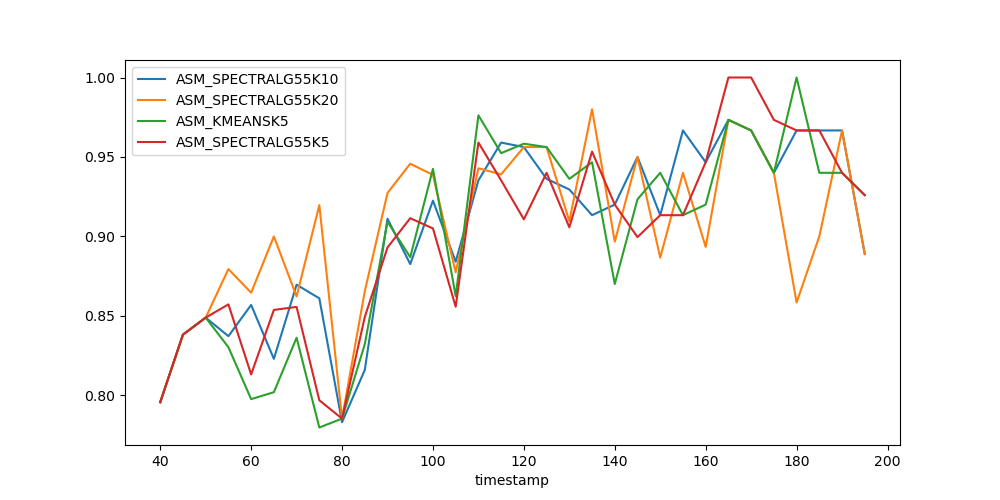

In [27]:
asm_profiled_df = None
asm_profiles = [v for k,v in profiled_df_dict.items() if "ASM" in k]
for asm_df in asm_profiles:
    if not isinstance(asm_profiled_df, pd.DataFrame):
        asm_profiled_df = asm_df
    else:
        asm_profiled_df = pd.merge(asm_profiled_df, asm_df, on="timestamp")
asm_profiled_df.plot.line(figsize=(10,5))

#### ASM: Baseline Vs Profile Enhanced

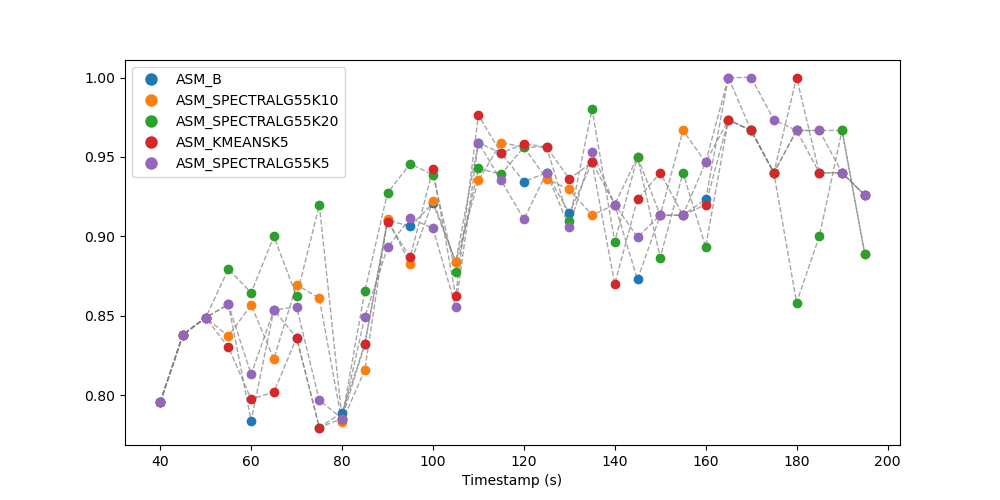

In [28]:
plot_baseline_vs_profile("ASM")

## LGBM

In [29]:
files = glob.glob("lgb_results/clustered/*_test.csv")
lgb_input_files = { get_profile_model_name(os.path.basename(x)) : x for x in files}
print(lgb_input_files)

{'LGB_SPECTRALG55K10': 'lgb_results/clustered/lgb_sk10f_spectralg55k10_test.csv', 'LGB_SPECTRALG55K5': 'lgb_results/clustered/lgb_sk10f_spectralg55k5_test.csv', 'LGB_SPECTRALG55K20': 'lgb_results/clustered/lgb_sk10f_spectralg55k20_test.csv', 'LGB_CSF_SPECTRALG55K5': 'lgb_results/clustered/lgb_sk10f_csf_spectralg55k5_test.csv', 'LGB_CSF_KMEANSK5': 'lgb_results/clustered/lgb_sk10f_csf_kmeansk5_test.csv', 'LGB_CSF_SPECTRALG55K10': 'lgb_results/clustered/lgb_sk10f_csf_spectralg55k10_test.csv', 'LGB_CSF_SPECTRALG55K20': 'lgb_results/clustered/lgb_sk10f_csf_spectralg55k20_test.csv', 'LGB_KMEANSK5': 'lgb_results/clustered/lgb_sk10f_kmeansk5_test.csv'}


In [30]:
for model_name, input_file in lgb_input_files.items():
    result_dict = {}
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    profiled_df_dict[model_name] = result_df
    profiled_auc_dict[model_name] = area

LGB_SPECTRALG55K10 12.70072631072631


LGB_SPECTRALG55K10 14.379240019240019
LGB_SPECTRALG55K5 12.757999037999038
LGB_SPECTRALG55K5 14.376184463684464
LGB_SPECTRALG55K20 12.742443482443482
LGB_SPECTRALG55K20 14.370390812890813
LGB_CSF_SPECTRALG55K5 13.327991822991821
LGB_CSF_SPECTRALG55K5 14.250630711880712
LGB_CSF_KMEANSK5 13.327991822991821
LGB_CSF_KMEANSK5 14.250630711880712
LGB_CSF_SPECTRALG55K10 13.327991822991821
LGB_CSF_SPECTRALG55K10 14.250630711880712
LGB_CSF_SPECTRALG55K20 13.327991822991821
LGB_CSF_SPECTRALG55K20 14.250630711880712
LGB_KMEANSK5 12.757999037999038
LGB_KMEANSK5 14.376184463684464


#### LGBM: Baseline Vs Profile Enhanced

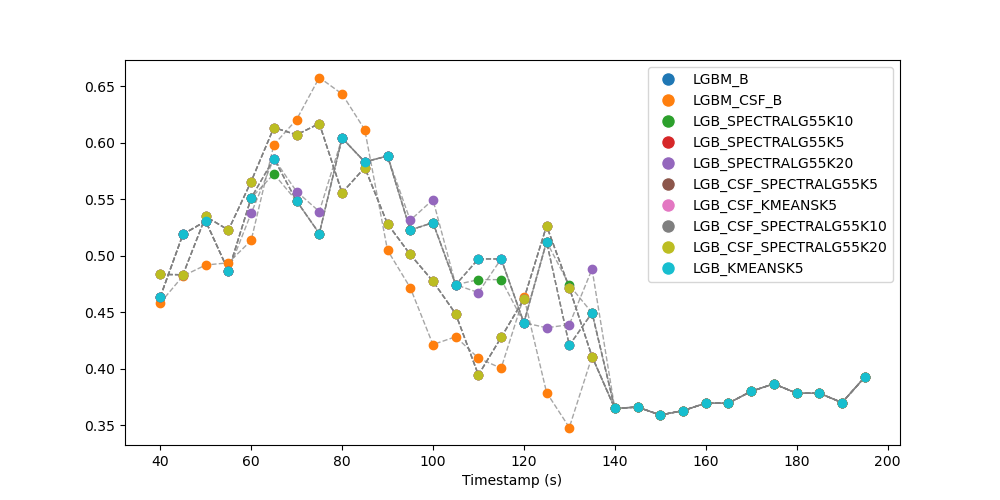

In [31]:
plot_baseline_vs_profile("LGB")

## LR

In [32]:
files = glob.glob("lr_results/clustered/*_test.csv")
lr_input_files = { get_profile_model_name(os.path.basename(x)) : x for x in files}
print(lr_input_files)

{'LR_SPECTRALG55K5': 'lr_results/clustered/lr_sk10f_spectralg55k5_test.csv', 'LR_CSF_SPECTRALG55K5': 'lr_results/clustered/lr_sk10f_csf_spectralg55k5_test.csv', 'LR_SPECTRALG55K10': 'lr_results/clustered/lr_sk10f_spectralg55k10_test.csv', 'LR_CSF_SPECTRALG55K20': 'lr_results/clustered/lr_sk10f_csf_spectralg55k20_test.csv', 'LR_CSF_KMEANSK5': 'lr_results/clustered/lr_sk10f_csf_kmeansk5_test.csv', 'LR_CSF_SPECTRALG55K10': 'lr_results/clustered/lr_sk10f_csf_spectralg55k10_test.csv', 'LR_SPECTRALG55K20': 'lr_results/clustered/lr_sk10f_spectralg55k20_test.csv', 'LR_KMEANSK5': 'lr_results/clustered/lr_sk10f_kmeansk5_test.csv'}


In [33]:
for model_name, input_file in lr_input_files.items():
    result_dict = {}
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    profiled_df_dict[model_name] = result_df
    profiled_auc_dict[model_name] = area

LR_SPECTRALG55K5 13.682692400192398
LR_SPECTRALG55K5 14.14181818181818
LR_SPECTRALG55K5 14.147029822029822
LR_CSF_SPECTRALG55K5 13.020857984607982
LR_SPECTRALG55K10 14.022201779701781
LR_SPECTRALG55K10 14.564675324675324
LR_SPECTRALG55K10 14.702029822029823
LR_CSF_SPECTRALG55K20 13.020857984607982
LR_CSF_KMEANSK5 13.020857984607982
LR_CSF_SPECTRALG55K10 13.020857984607982
LR_SPECTRALG55K20 14.902718855218852
LR_SPECTRALG55K20 15.51973063973064
LR_KMEANSK5 14.133393458393456


<AxesSubplot:xlabel='timestamp'>

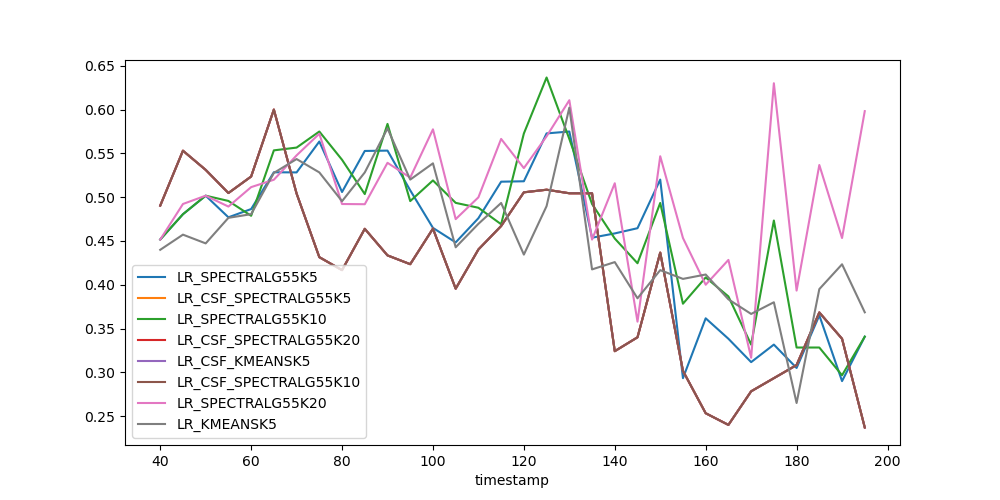

In [34]:
lr_profiled_df = None
lr_profiles = [v for k,v in profiled_df_dict.items() if "LR" in k]
for lr_df in lr_profiles:
    if not isinstance(lr_profiled_df, pd.DataFrame):
        lr_profiled_df = lr_df
    else:
        lr_profiled_df = pd.merge(lr_profiled_df, lr_df, on="timestamp")
lr_profiled_df.plot.line(figsize=(10,5))

### LR: Baseline vs Profiled

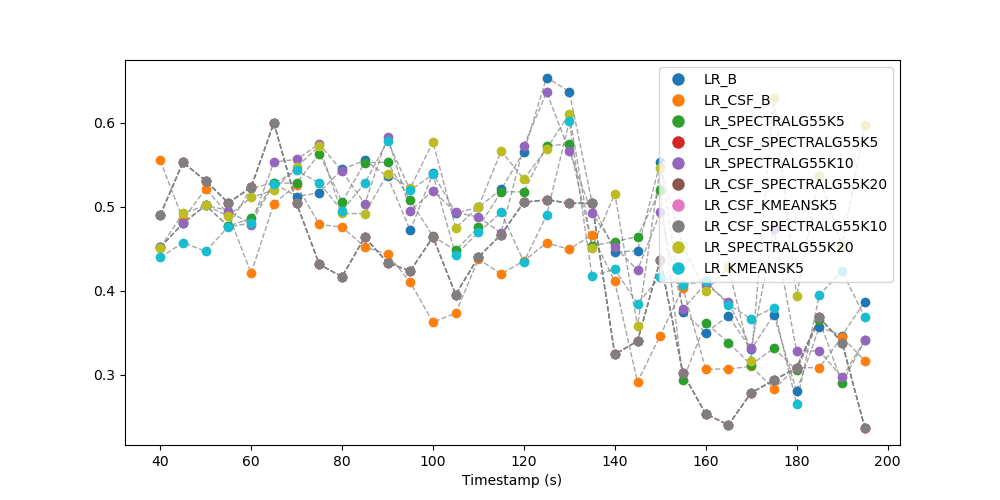

In [35]:
plot_baseline_vs_profile("LR")

## RF

In [37]:
files = glob.glob("rf_results/clustered/*_test.csv")
rf_input_files = { get_profile_model_name(os.path.basename(x)) : x for x in files}
print(rf_input_files)

{'RF_SPECTRALG55K20': 'rf_results/clustered/rf_sk10f_spectralg55k20_test.csv', 'RF_SPECTRALG55K5': 'rf_results/clustered/rf_sk10f_spectralg55k5_test.csv', 'RF_CSF_SPECTRALG55K5': 'rf_results/clustered/rf_sk10f_csf_spectralg55k5_test.csv', 'RF_SPECTRALG55K10': 'rf_results/clustered/rf_sk10f_spectralg55k10_test.csv', 'RF_KMEANSK5': 'rf_results/clustered/rf_sk10f_kmeansk5_test.csv', 'RF_CSF_KMEANSK5': 'rf_results/clustered/rf_sk10f_csf_kmeansk5_test.csv', 'RF_CSF_SPECTRALG55K20': 'rf_results/clustered/rf_sk10f_csf_spectralg55k20_test.csv', 'RF_CSF_SPECTRALG55K10': 'rf_results/clustered/rf_sk10f_csf_spectralg55k10_test.csv'}


In [38]:
for model_name, input_file in rf_input_files.items():
    result_dict = {}
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
    profiled_df_dict[model_name] = result_df
    profiled_auc_dict[model_name] = area

RF_SPECTRALG55K20 16.161881313131314
RF_SPECTRALG55K5 16.70383116883117
RF_CSF_SPECTRALG55K5 16.70152958152958
RF_SPECTRALG55K10 16.615019841269838
RF_KMEANSK5 15.932958152958154
RF_CSF_KMEANSK5 16.729920634920635
RF_CSF_SPECTRALG55K20 15.98654942279942
RF_CSF_SPECTRALG55K20 16.317949134199136
RF_CSF_SPECTRALG55K10 16.59806818181818


<AxesSubplot:xlabel='timestamp'>

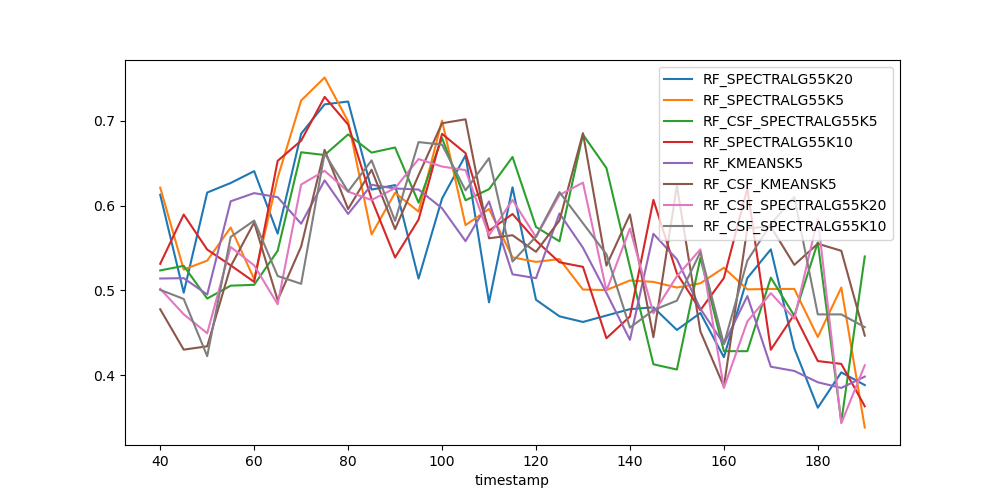

In [39]:
rf_profiled_df = merge_all_dfs([v for k,v in profiled_df_dict.items() if "RF" in k])
rf_profiled_df.plot.line(figsize=(10,5))

### RF: Baseline vs Profiled

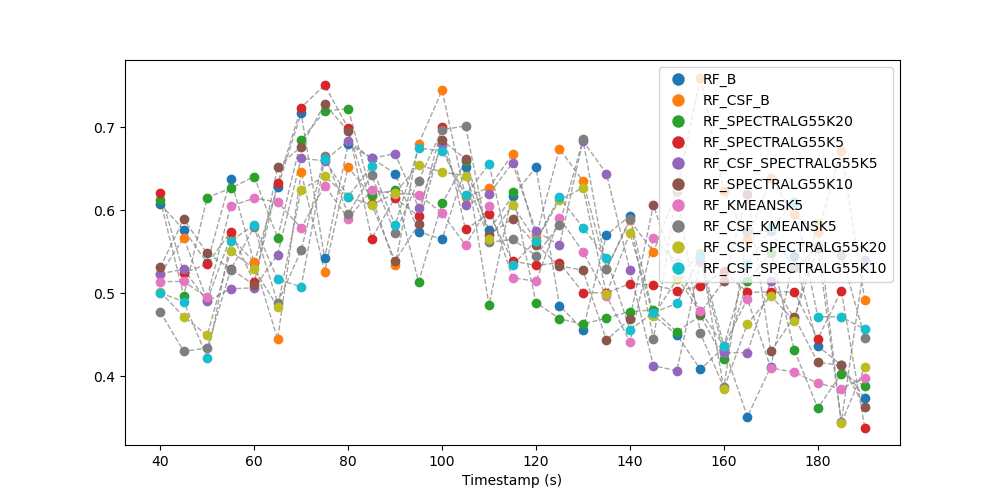

In [40]:
plot_baseline_vs_profile("RF")

### All profiled

<AxesSubplot:xlabel='timestamp'>

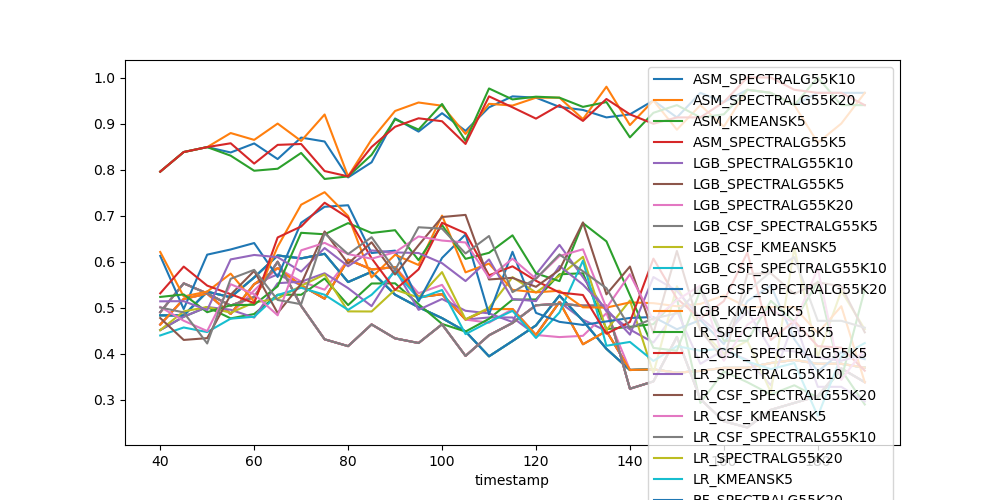

In [41]:
all_profiled_df = merge_all_dfs(profiled_df_dict.values())
all_profiled_df.plot.line(figsize=(10,5))

## Full Comparison

Float64Index([ 25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,  60.0,  65.0,
               70.0,  75.0,  80.0,  85.0,  90.0,  95.0, 100.0, 105.0, 110.0,
              115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0,
              160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0],
             dtype='float64', name='timestamp')
Int64Index([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
            ...
            565, 570, 575, 580, 585, 590, 595, 600, 605, 610],
           dtype='int64', name='timestamp', length=119)


/raid/home/smelo/anaconda3/envs/pytorchgeo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


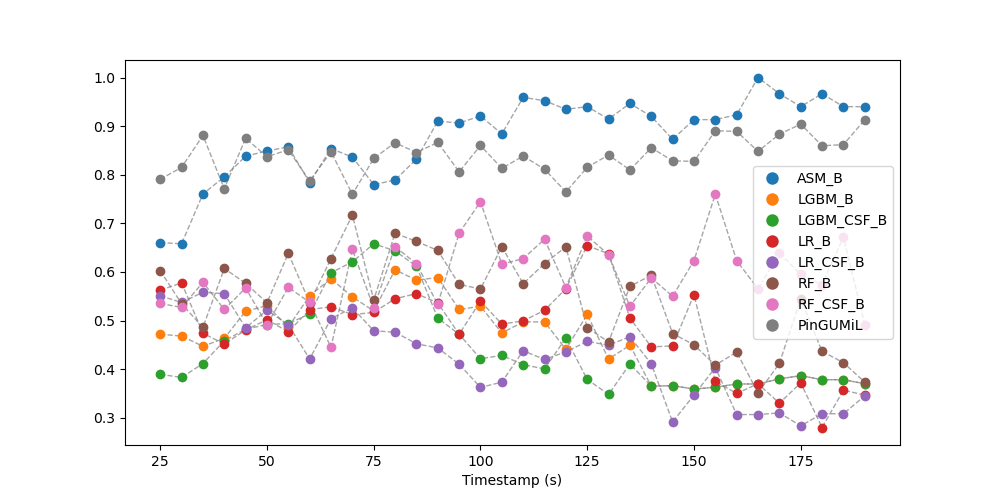

In [47]:
print(all_baselines_df.index)
print(pingumil_df.index)
cp_baseping_df = pd.merge(all_baselines_df, pingumil_df, on="timestamp", how="inner")
#cp_baseping_df = pd.merge(cp_baseping_df, all_profiled_df, on="timestamp", how="inner")
#cp_baseping_df.plot.line(figsize=(10,5))
plot_df(cp_baseping_df)

In [48]:
# Calculate trapezoidal area of each model
auc_dict = {"model" : [], "auc" : []}
for model in cp_baseping_df.columns:
    auc_dict["model"].append(model)
    auc_dict["auc"].append(trapz(cp_baseping_df[model], dx=1))
auc_df = pd.DataFrame.from_dict(auc_dict)
print(auc_df.sort_values(by="auc", ascending=False))

        model        auc
0       ASM_B  29.057679
7    PinGUMiL  27.694623
6    RF_CSF_B  19.655260
5        RF_B  17.942922
3        LR_B  15.900653
1      LGBM_B  15.377724
2  LGBM_CSF_B  14.699181
4    LR_CSF_B  13.986728


In [49]:
# Get only the best ones for each model
best_models = []
for model_prefix in ["ASM", "LR", "RF", "PinGUMiL", "LGB"]:
    mask = auc_df["model"].str.contains(model_prefix)
    best_model_row = auc_df[mask].sort_values(by="auc", ascending=False).iloc[0]
    best_models.append(best_model_row["model"])
print(best_models)

['ASM_B', 'LR_B', 'RF_CSF_B', 'PinGUMiL', 'LGBM_B']


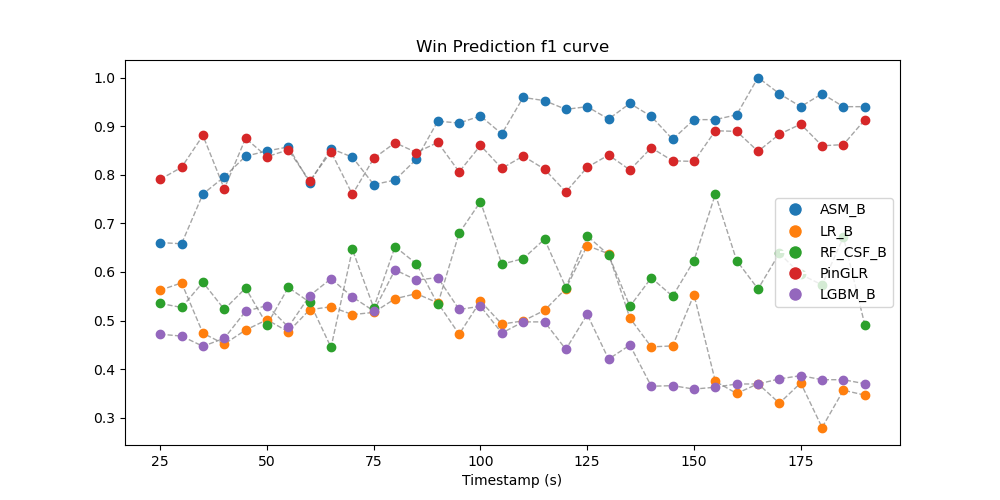

In [57]:
top_models = cp_baseping_df[best_models]
rename = lambda x: "_".join(x.split("_")[:-1]) if "_" in x else x
rename = {
    #"ASM_SPECTRALG55K20" : "ASM+PinGLR",
    #"LR_SPECTRALG55K20" : "LR+PinGLR",
    #"LGB_SPECTRALG55K10" : "LGB+PinGLR",
    #"RF_CSF_B" : "RF+CSF",
    "PinGUMiL" : "PinGLR"
}
top_models.columns = [rename[x] if x in rename else x for x in top_models.columns]
#top_models.plot.line(figsize=(10,5), title="Win Prediction f1 curve")
plot_df(top_models, title="Win Prediction f1 curve")

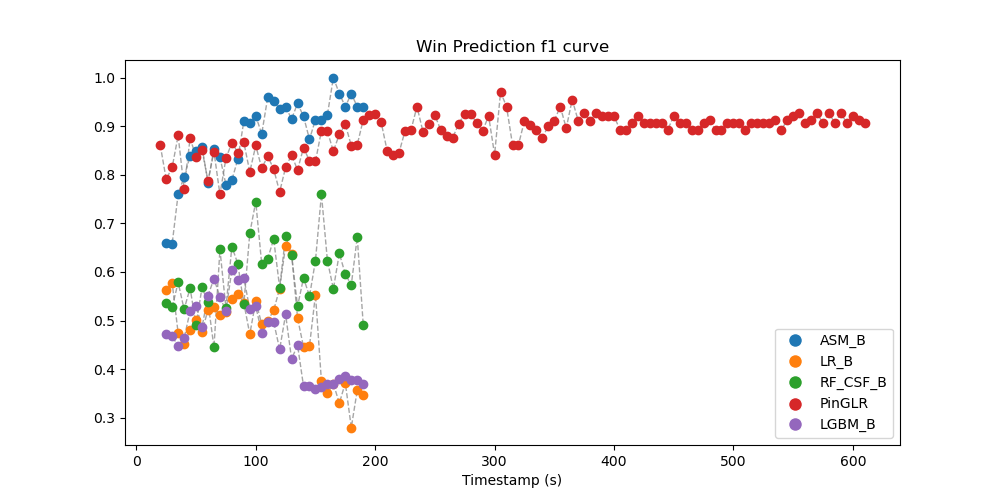

In [59]:
cp_outer_df = pd.merge(all_baselines_df, pingumil_df, on="timestamp", how="right")
cp_outer_df = pd.merge(cp_outer_df, all_profiled_df, on="timestamp", how="left")
#cp_outer_df[best_models].plot.line(figsize=(10,5))
out_top_models = cp_outer_df[best_models]
out_top_models.columns = [rename[x] if x in rename else x for x in out_top_models.columns]
plot_df(out_top_models, title="Win Prediction f1 curve")